# Wstęp teoretyczny

## Problem przepływowy

Problem flowshop (Flow Shop Scheduling Problem - FSSP) jest jednym z klasycznych zagadnień teorii harmonogramowania, mających na celu optymalizację procesu produkcyjnego. W klasycznej odsłonie (F||Cmax) należy do klasy najtrudniejszych, silnie NP-trudnych, problemów optymalizacji kombinatorycznej. 

Problem przepływowy z ciągłą pracą maszyn można sformułować w następujący sposób:

Istnieje zbór zadań:
$$    J = {J_1, J_2 . . . , J_n}   $$

Które należy wykonać na maszynach:
$$ M = {M_1, M_2 . . . , M_m}. $$

Każde z zadań $ J $ jest opisane ciągiem $ m $ operacji:

$$ O_{i,j} = {O_{i,1}, O_{i,2} . . . . O_{i,m}} $$

Przy czym każda z operacji $ O_{i,j} $ musi zostać wykonan na odpowiedniej maszynie $ M_j $ w czsie $ p_{i,j} $, oraz każda z operacji $ O_{i,j} $ może zostać wykonana dopiero gdy zakończone zostane wszystkie operacje poprzedzające tego zadania. Cały proces musi spełniać następujące zasady:

1. Każda operacja może być realizowana tylko przez jedną, określoną w technologii maszynę.

1. Każda maszyna może wykonywać w danym czasie tylko jedną operację.

1. Dla każdego zadania musi być zachowany określony technologiczny porządek operacji.

1. Żadna operacja nie może być przerwana do momentu jej ukończenia.

1. Wyróżnione maszyny muszą pracować w trybie ciągłym.

1. Zadania moga być wykonywane niezależnie od siebie

Rozwiązaniem problemu jest konkretna permutacja liczb $ {1, 2, ... n} $ która poskutkuje najrótszym czasem wykonania wszystkich zadań.



## Algotytm Genetyczny

Algorytm genetyczny (GA) jest iteracyjną metodą metaheurystyczną która nie daje gwarancji znalezienia najleprzego rozwiązania. Ta metoda optymalizacji inspirowana procesem naturalnej ewolucji, i jej podstawą działania jest generowanie nowych $ Populacji $ poprzez przeprowadzanie podstawowych operacji insirowanych naturalnym procesem. 

$ Osobnik $ - jedo rozwiązanie piodjętego problemu.
$ Populacja $ - zbiór osobników określonego rozmiaru. 

Przebieg algorytmu genetycznego:

1. inicjalizacja populacji

2. Następne kroki wykonywane są $ generacje $ razy:

    1. Faza $ Selekcji $

    1. Faza $ Krzyżowania $

    1. Faza $ Mutacji $

    1. Analiza i aktualizacja wyników

$ Selekcja $ - reprezentuje rywalizację między osobnikami o przetrwanie i możliwość reprodukcjiprzekazania swoich genów. Podstawowym kryterim oceny siły osobnika jest jego wartość funkcji celu. W tym przypadku im mniejsza wartosć funkcji celu tym silniejszy osobnik. 

$ Krzyżowanie $ - reprezentuje proces powstawania osobników nowej populacji poprzez przekazywanie części genów rodziców. W ten sposób nowe osobniki otrzymują część genów każdego z rodziców i stanowią reprezentację różnych cech, podobnie jak ma to miejsce w naturze.

$ Mutacja $ - reprezentuje proces mutacji które moga zająś pod pewnym $ prawdopodobieństwem mutacji $, proces zmienia w pewnien losowy sposób osobnika prowadzi do powstania nowych cech które w losowy sposób wpływają na zdolność osobnika od przetrwania



### Opis hiperparametrów algorytmu

rozmiar populacji - określa ilość osobników w populacji

częstotliwość mutacji - pewna wartośc progowa z zakresu (0 - 100), określa z jakim prawdopodobieństwem będzie dochodziło do mutacji osobników.

generacje - liczba całkowita, określa ile razy ma przejść główna petla algorytmu

##### Typ mutacji
W programie zostały zaimplementowane trzy typy mutacji:
1. soft (słaba) - polega na zamianie miejscami dwóch sąsiadów w permutacji
1. mid (średnia) - polega na zamianie miejscami dwóch loswych elementów w permutacji
1. hard (mocna) - dzieli osobnika na pół i zamienia powstałe tak ciągi kolejnością

##### Typ krzyżowania
W programie zostały zaimplementowane trzy typy krzyżowania:
1. simple (proste) - polega na połączeniu pierwszej połowy rodzica1 z drugą połową rodzica2
1. section (sekcjami) - polega na przekazaniu ciągu permutacji z rodzica1 do potomka i uzupełnienie reszty elementami w kolejności wystepowania w rodzicu 2
1. nearest (najbliżym sąsiadem) - krzyżowanie wybierające losowy ciąg z permutacji rodzica a reszte uzupełnia na zasadzie szeregowania zadań po długości czasu wykonania

##### Typ selekcji
Zaimplementowano dwa rodzaje selekcji
1. roulette (ruletkowa) - wybierającą określoną częśc osobników na podstawie prawdopodobieństwa ważonego względem jakości osobników
1. tournament (turniejowa) - polega na wyborze losowych osobników do grupy turniejowej a następnie przepuszcza do populacji tego o największej sile




In [2]:
from TestingEssentials import GenerateJ, EvaluateC, C_Max, C_MaxFromC, start_t
from DataVisualization import plot_schedule_fancy
from GeneticAlgorithm import GeneticAlgorithm
from TestingEssentials import getMakData as get_data_from_file
from nehpy import neh
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Parametry dla algorytmu genetycznego

In [4]:
#Generuje zbiór danych wejściowych
J, _  = GenerateJ(100,5,5)

J_list = [GenerateJ(10,5,i) for i in range(0,50)]
J_list, _ = zip(*J_list)

#Możliwe operatory genetyczne do dalszego przetwarzania
mutations = ["hard", "mid", "soft"]
crossovers = ["simple", "section", "sectionSP", "greedy"]
selections = ["roulette", "tournament"]

#Parametry algrytmu genetycznego
population_size = 50
mutation_rate = 0.2
generations = 1000

### Szukanie najlepszej kombinacji operatorów genetycznych

In [5]:
results = []
for J in J_list:
    nehcmax = neh(J.copy())
    for mutation in mutations:
        for crossover in crossovers:
            for selection in selections:
                ga = GeneticAlgorithm(J, 
                            population_size, 
                            mutation_rate, 
                            generations,
                            mutation_type=mutation, 
                            crossover_type=crossover, 
                            selection_type=selection,
                            register_all = False)
                best_solutions = ga.Genetic()
                for i in range(len(best_solutions)):
                    best_solution = best_solutions[i]
                    best_solution_Cmax = C_Max(J,best_solution)
                    percentage = (nehcmax - best_solution_Cmax)
                    percentage = percentage/nehcmax
                    results.append({'combination': mutation+"_"+crossover+"_"+selection, 'generation': i,'Cmax': best_solution_Cmax, 'percentage': percentage})




best_solution_Cmax = C_Max(J,best_solution)
best_solution = [elem + 1 for elem in best_solution]


# Zapisz wyniki do dataframe
df = pd.DataFrame(results)


In [6]:
# Wyświetl wyniki
print(df.head(10))
df.to_csv('data_combinations_results.csv', index=False)

            combination  generation  Cmax  percentage
0  hard_simple_roulette           0   181   -0.040230
1  hard_simple_roulette           1   178   -0.022989
2  hard_simple_roulette           2   178   -0.022989
3  hard_simple_roulette           3   178   -0.022989
4  hard_simple_roulette           4   178   -0.022989
5  hard_simple_roulette           5   178   -0.022989
6  hard_simple_roulette           6   175   -0.005747
7  hard_simple_roulette           7   175   -0.005747
8  hard_simple_roulette           8   175   -0.005747
9  hard_simple_roulette           9   175   -0.005747


#### Poszukiewanie kombinacji która średnio wypada najlepiej

In [7]:
final = df[df["generation"].isin([df["generation"].max()])]
# print(final)
mean_for_each_config_final = final.groupby(['combination'])['percentage'].mean()
mean_for_each_config = df.groupby(['combination','generation'],group_keys = False).mean()

# print(mean_for_each_pop_value)
# print(mean_for_each_config)
# print(mean_for_each_gen_value)


# Znajdź indeksy dla maksymalnych wartości średnich w kolumnie 'percentage'
best_config_index = mean_for_each_config_final.idxmax()

# print(best_config_index)

# Wyświetl kombinację parametrów dla najlepszej średniej 'percentage'
best_config_params = mean_for_each_config_final.loc[[best_config_index]]
print("kombinacja która wypadła średnio najlepiej:\n",best_config_params)

kombinacja która wypadła średnio najlepiej:
 combination
mid_sectionSP_tournament    0.009034
Name: percentage, dtype: float64


In [8]:
final_2 = df[df["percentage"].isin([df["percentage"].max()])]
print("kombinacje które uzyskały największe wyniki:")
print(final_2['combination'].unique())

mean_for_each_config_final = final_2['percentage'].max()
print("Wynik:",mean_for_each_config_final)


kombinacje które uzyskały największe wyniki:
['hard_sectionSP_tournament' 'mid_section_tournament'
 'mid_sectionSP_tournament' 'soft_section_tournament']
Wynik: 0.05228758169934641


In [9]:
import warnings
# warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

warnings.filterwarnings(
    action="ignore",
    message=r"When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas\. Pass `\(name,\)` instead of `name` to silence this warning\.",
    category=FutureWarning,
)


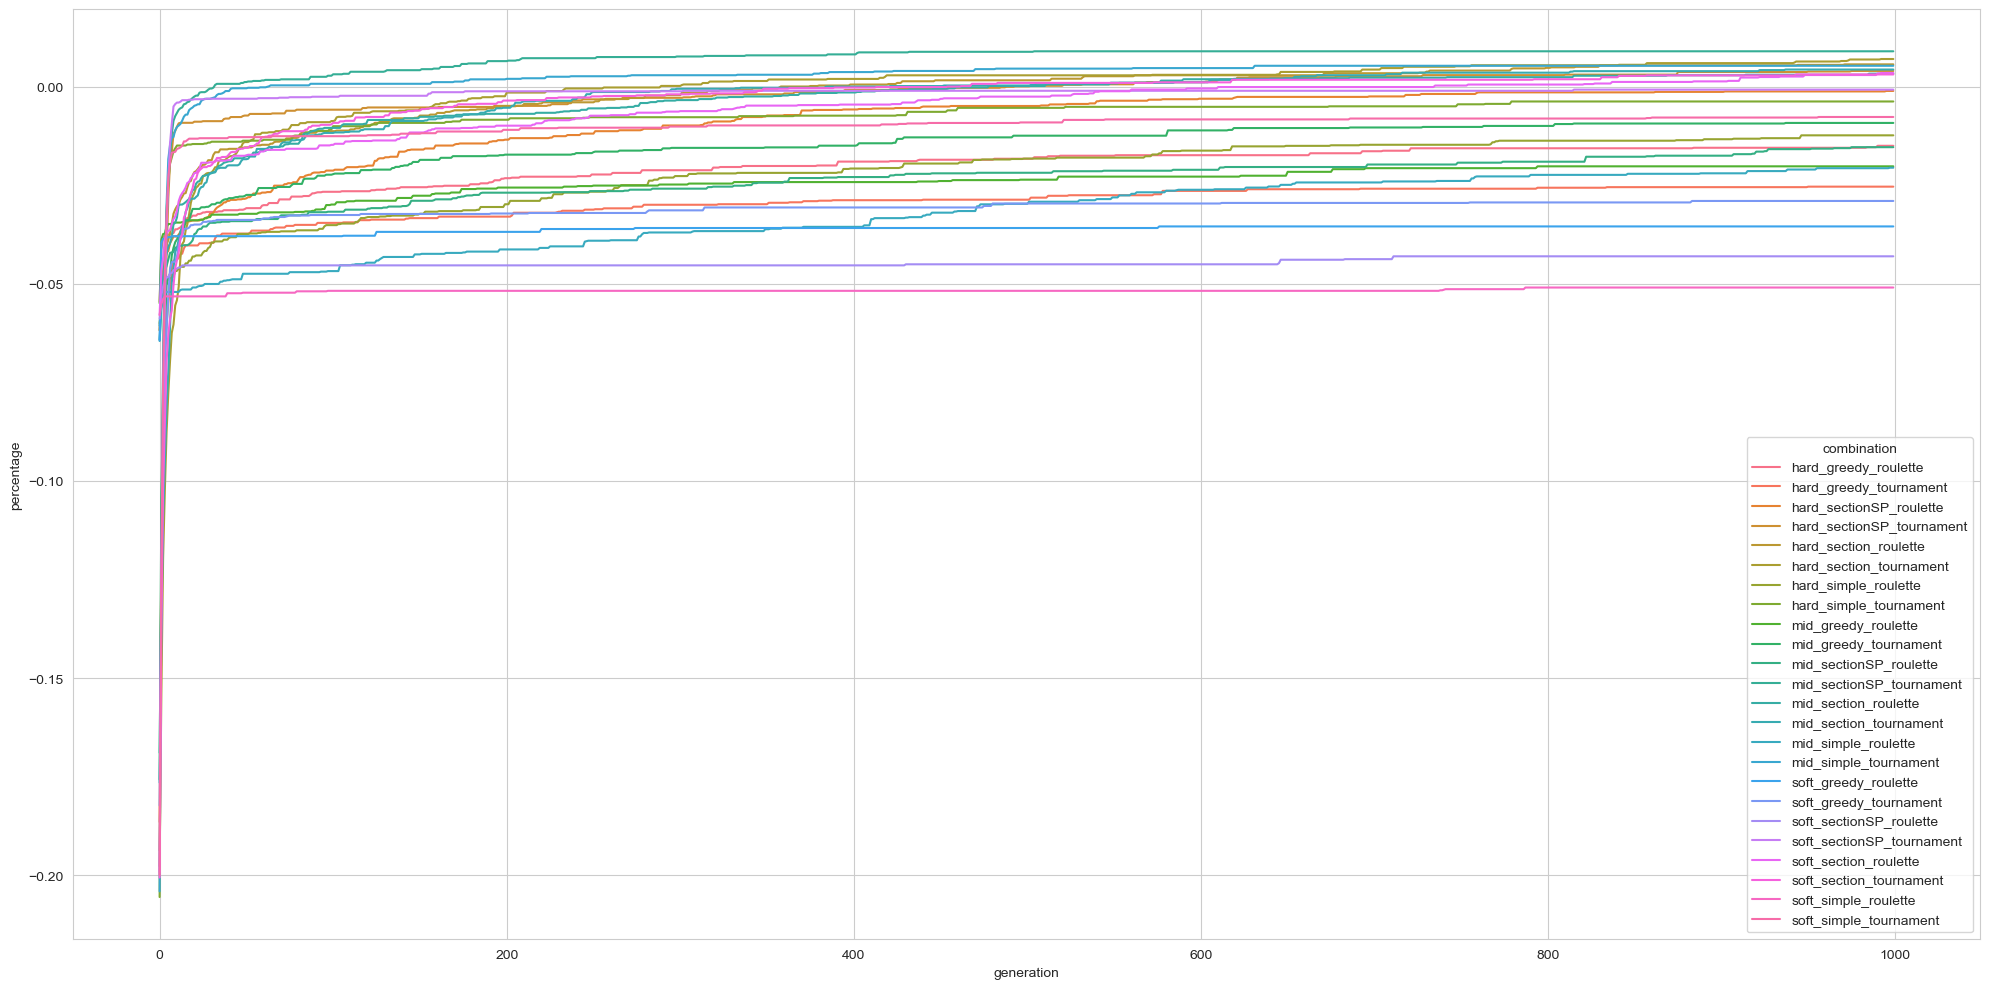

In [10]:
sns.set_style("whitegrid")
pd.set_option('mode.use_inf_as_na', False)
fig = plt.subplots(figsize=(20, 10))
sns.lineplot(x = "generation", y = "percentage", data=mean_for_each_config, hue='combination')

plt.tight_layout()
plt.show()


In [11]:
best_combo = final_2['combination'].unique()
best_combo = best_combo.tolist()
best_combo.append(best_config_index)
# best_combo
best_combination_data = df[df["combination"].isin(best_combo)]

best_combination_data = best_combination_data.groupby(['combination','generation'],group_keys = False).mean()

# mean_for_each_config[mean_for_each_config["combination"].isin(best_combo)]

### Wybrane najlepsze kombinacje

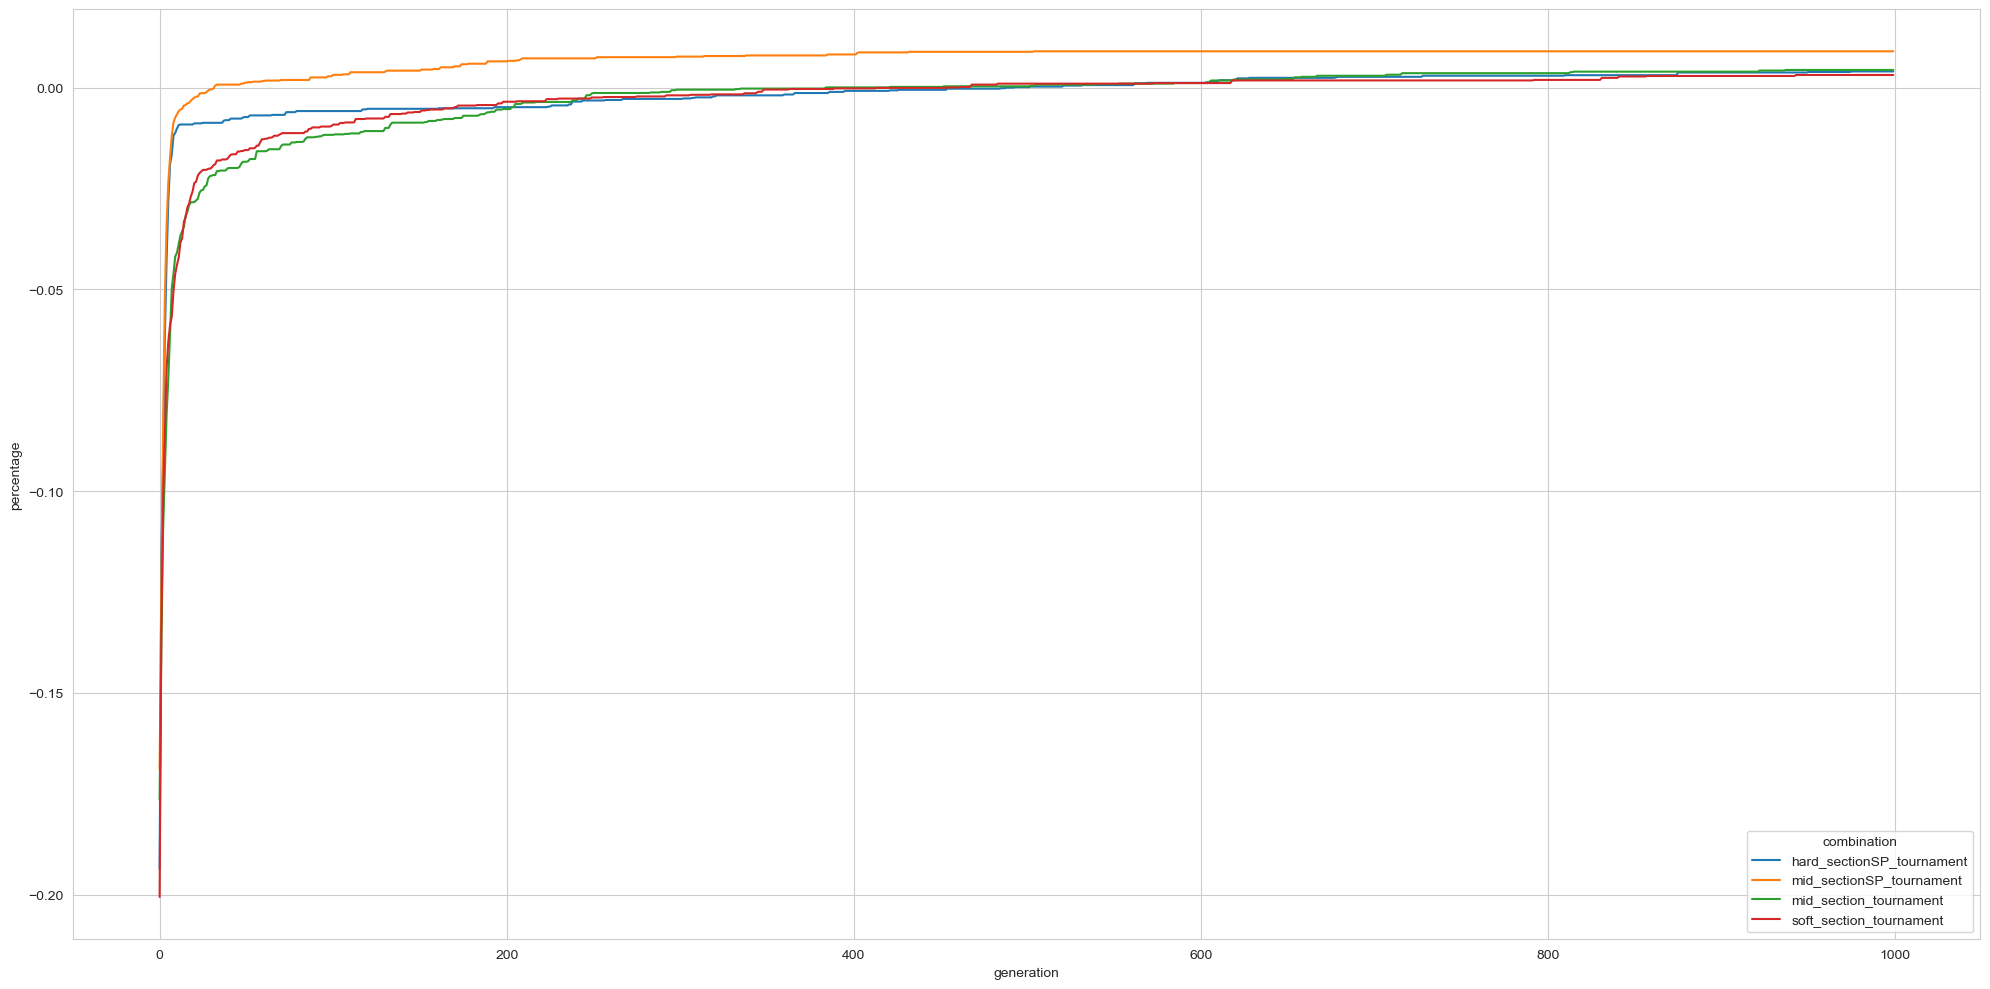

In [12]:
sns.set_style("whitegrid")
pd.set_option('mode.use_inf_as_na', False)
fig = plt.subplots(figsize=(20, 10))
sns.lineplot(x = "generation", y = "percentage", data=best_combination_data, hue='combination')

plt.tight_layout()
plt.show()


### Szukanie najlepszych hiperaparametrów przy pomocy metody przeszukiwania siatki

In [76]:
J_list = [GenerateJ(10,5,i) for i in range(0,50)]
J_list, _ = zip(*J_list)


# Parametry algorytmu genetycznego
population_sizes = [50, 100, 200, 300]
mutation_rates = [0.1, 0.2, 0.3, 0.4, 0.5]

# population_sizes = [50, 100]
# mutation_rates = [0.1, 0.2]
# generations = [500, 1000]


# population_sizes = [50]
# mutation_rates = [0.1]
# generations = [500]

results = []

In [77]:
generations = 400

for J in J_list:
    nehcmax = neh(J.copy())
    for i in range(len(best_combo)):
        mutation, crossover, selection = best_combo[i].split(sep="_")
        for pop_size in population_sizes:
            for mut_rate in mutation_rates:
                    ga = GeneticAlgorithm(J, 
                                pop_size, 
                                mut_rate, 
                                generations,
                                mutation_type=mutation, 
                                crossover_type=crossover, 
                                selection_type=selection)
                    best_solutions = ga.Genetic()
                    for i in range(len(best_solutions)):
                        best_solution = best_solutions[i]
                        best_solution_Cmax = C_Max(J,best_solution)
                        percentage = (nehcmax - best_solution_Cmax)
                        percentage = percentage/nehcmax
                        results.append({'operators': mutation+"_"+crossover+"_"+selection, 'combination': mutation+"_"+crossover+"_"+selection+", pop size: "+str(pop_size)+", mut rate: "+str(mut_rate), 'generation': i,'Cmax': best_solution_Cmax, 'percentage': percentage})





best_solution_Cmax = C_Max(J,best_solution)
best_solution = [elem + 1 for elem in best_solution]


# Zapisz wyniki do dataframe
df2 = pd.DataFrame(results)

In [81]:
print(df2.head(10))
df2.to_csv('data_combinations_results_params.csv', index=False)

                 operators                                        combination  \
0  hard_section_tournament  hard_section_tournament, pop size: 50, mut rat...   
1  hard_section_tournament  hard_section_tournament, pop size: 50, mut rat...   
2  hard_section_tournament  hard_section_tournament, pop size: 50, mut rat...   
3  hard_section_tournament  hard_section_tournament, pop size: 50, mut rat...   
4  hard_section_tournament  hard_section_tournament, pop size: 50, mut rat...   
5  hard_section_tournament  hard_section_tournament, pop size: 50, mut rat...   
6  hard_section_tournament  hard_section_tournament, pop size: 50, mut rat...   
7  hard_section_tournament  hard_section_tournament, pop size: 50, mut rat...   
8  hard_section_tournament  hard_section_tournament, pop size: 50, mut rat...   
9  hard_section_tournament  hard_section_tournament, pop size: 50, mut rat...   

   generation  Cmax  percentage  
0           0   207   -0.189655  
1           1   174    0.000000  
2     

In [85]:
mean_for_each_config = df2.groupby(['operators','combination','generation'],group_keys = False).mean()

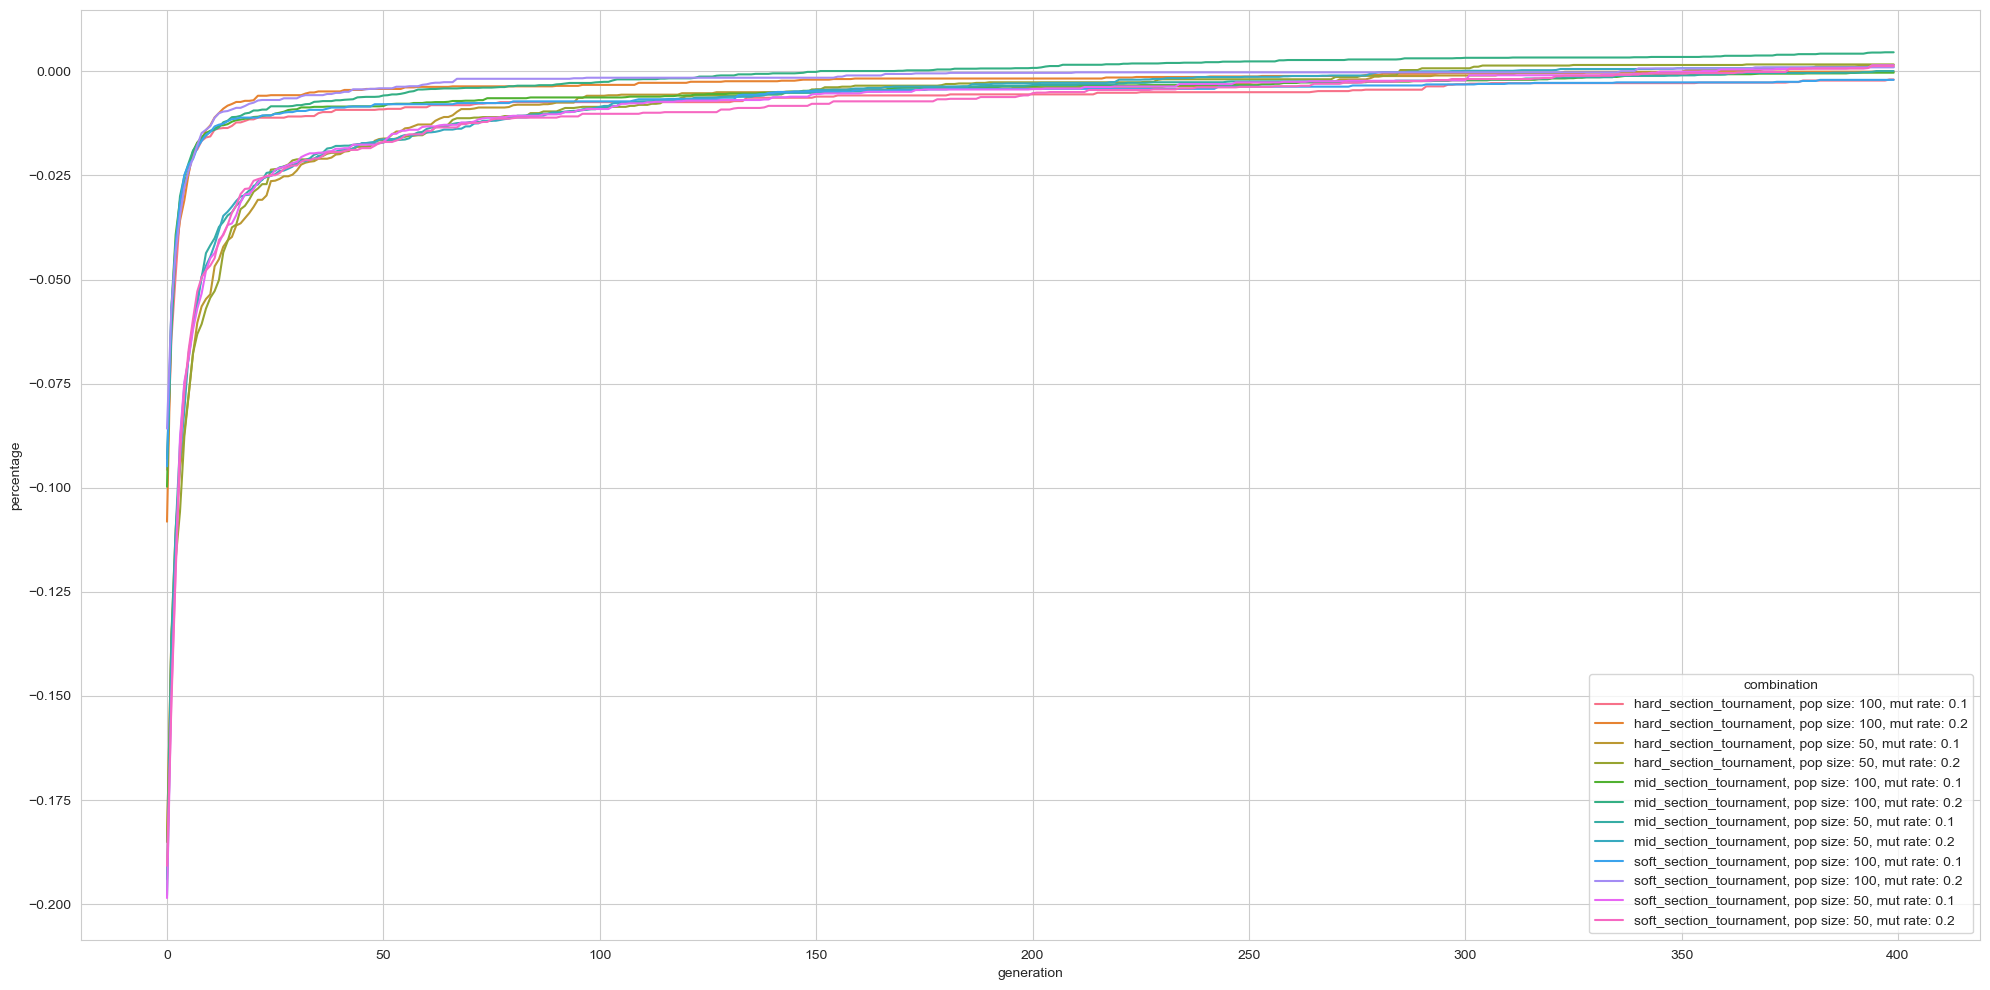

In [86]:
sns.set_style("whitegrid")
pd.set_option('mode.use_inf_as_na', False)
fig = plt.subplots(figsize=(20, 10))
sns.lineplot(x = "generation", y = "percentage", data=mean_for_each_config, hue='combination')

plt.tight_layout()
plt.show()

In [100]:
final = df2[df2["generation"].isin([df2["generation"].max()])]
# print(final)
mean_for_each_config_final = final.groupby(['combination'])['percentage'].mean()
mean_for_each_config = df2.groupby(['combination','operators','generation'],group_keys = False).mean()

# print(mean_for_each_pop_value)
# print(mean_for_each_config)
# print(mean_for_each_gen_value)


# Znajdź indeksy dla maksymalnych wartości średnich w kolumnie 'percentage'
best_config_index = mean_for_each_config_final.idxmax()

# print(best_config_index)

# Wyświetl kombinację parametrów dla najlepszej średniej 'percentage'
best_config_params = mean_for_each_config_final.loc[[best_config_index]]
print("kombinacja która wypadła średnio najlepiej:\n",best_config_params)

kombinacja która wypadła średnio najlepiej:
 combination
mid_section_tournament, pop size: 100, mut rate: 0.2    0.00459
Name: percentage, dtype: float64


In [186]:
mean_for_each_config_final = final.groupby(['combination','operators'])['percentage'].mean()

mean_for_each_config_f2 = mean_for_each_config_final.loc[mean_for_each_config_final.groupby('operators').idxmax()]

best_combo2 = [mean_for_each_config_f2.index[i][0] for i in range(len(mean_for_each_config_f2))]
best_combo2


['hard_section_tournament, pop size: 50, mut rate: 0.2',
 'mid_section_tournament, pop size: 100, mut rate: 0.2',
 'soft_section_tournament, pop size: 50, mut rate: 0.1']

In [187]:
best_combination_data2 = df2[df2["combination"].isin(best_combo2)]

best_combination_data2

best_combination_data2 = best_combination_data2.groupby(['operators','combination','generation'],group_keys = False).mean()


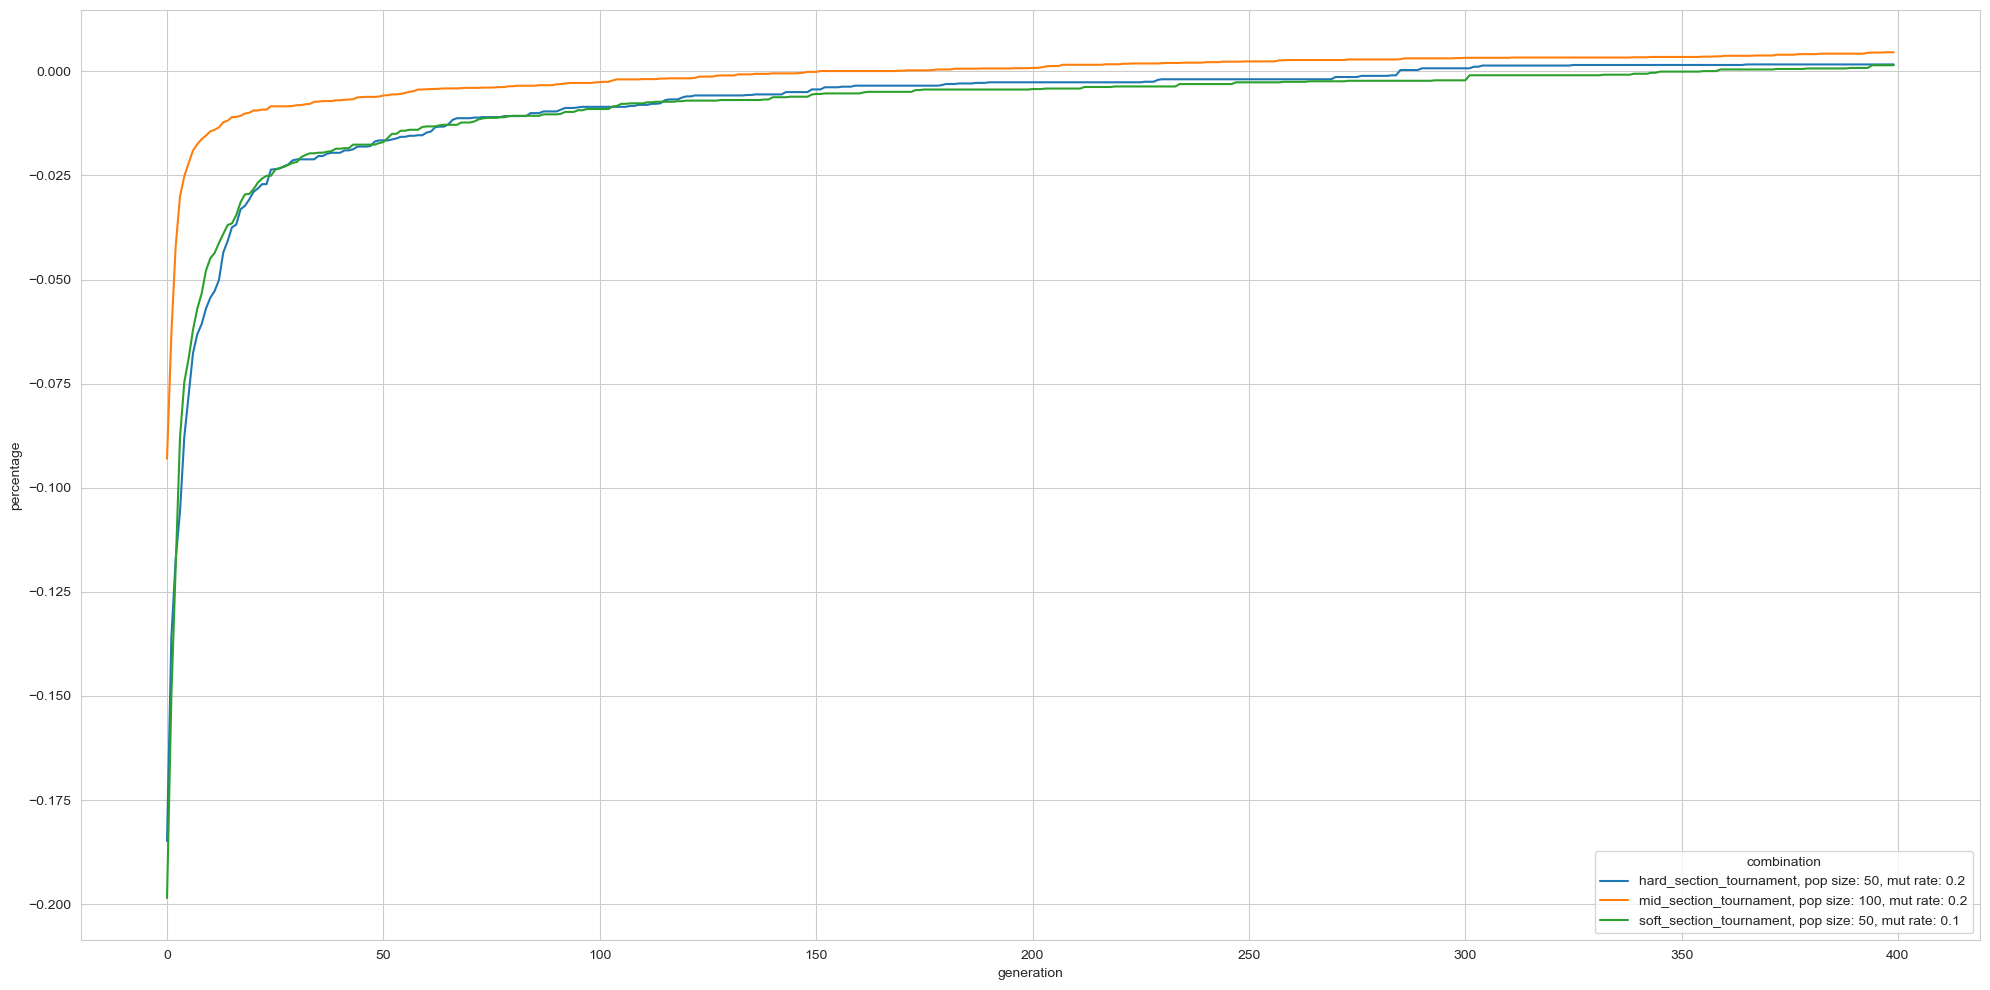

In [188]:
sns.set_style("whitegrid")
pd.set_option('mode.use_inf_as_na', False)
fig = plt.subplots(figsize=(20, 10))
sns.lineplot(x = "generation", y = "percentage", data=best_combination_data2, hue='combination')

plt.tight_layout()
plt.show()